In [1]:

import sys
import joblib
import mlrose_hiive as mlrose
import numpy as np
import matplotlib.pyplot as plt
import time
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score

from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.model_selection import learning_curve
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import validation_curve
from sklearn.model_selection import KFold, cross_val_score
import random


# N-Queens

In [2]:

# find the best decay for SA
fitness = mlrose.Queens()  # Example fitness function (can be replaced with any other function)
decays = [0.95, 0.99] 
sizes = [4, 6, 8, 10, 12, 15, 20]
results = []
best_decays = []
# Run SA with different hyperparameters
for size in sizes:
    for decay in decays:
        problem = mlrose.DiscreteOpt(length=size, fitness_fn=fitness, maximize=False, max_val=size) 
        start_time = time.time()
        schedule = mlrose.GeomDecay(init_temp=1, decay=decay, min_temp=0.01)
        # Run SA
        best_state, best_fitness, curve = mlrose.simulated_annealing(problem, schedule=schedule, max_attempts=100, max_iters=1000)
        end_time = time.time()
        duration = end_time - start_time
        results.append(best_fitness)
        # Print results
        print(f"Decay: {decay}, Size: {size}, Best Fitness: {best_fitness}, Duration: {duration:.4f} seconds")


Decay: 0.95, Size: 4, Best Fitness: 0.0, Duration: 0.0085 seconds
Decay: 0.99, Size: 4, Best Fitness: 0.0, Duration: 0.0138 seconds
Decay: 0.95, Size: 6, Best Fitness: 1.0, Duration: 0.0597 seconds
Decay: 0.99, Size: 6, Best Fitness: 0.0, Duration: 0.0125 seconds
Decay: 0.95, Size: 8, Best Fitness: 0.0, Duration: 0.0301 seconds
Decay: 0.99, Size: 8, Best Fitness: 1.0, Duration: 0.0162 seconds
Decay: 0.95, Size: 10, Best Fitness: 0.0, Duration: 0.0265 seconds
Decay: 0.99, Size: 10, Best Fitness: 1.0, Duration: 0.0941 seconds
Decay: 0.95, Size: 12, Best Fitness: 1.0, Duration: 0.0801 seconds
Decay: 0.99, Size: 12, Best Fitness: 0.0, Duration: 0.0468 seconds
Decay: 0.95, Size: 15, Best Fitness: 1.0, Duration: 0.1257 seconds
Decay: 0.99, Size: 15, Best Fitness: 1.0, Duration: 0.0545 seconds
Decay: 0.95, Size: 20, Best Fitness: 1.0, Duration: 0.1379 seconds
Decay: 0.99, Size: 20, Best Fitness: 2.0, Duration: 0.1737 seconds


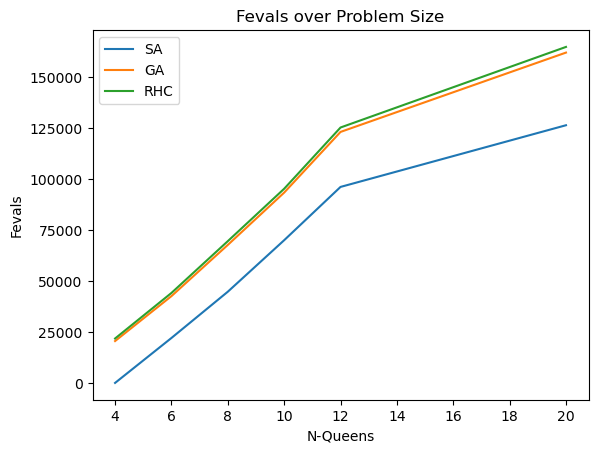

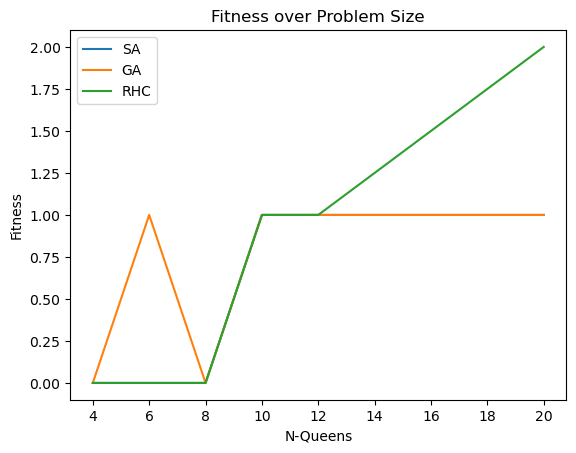

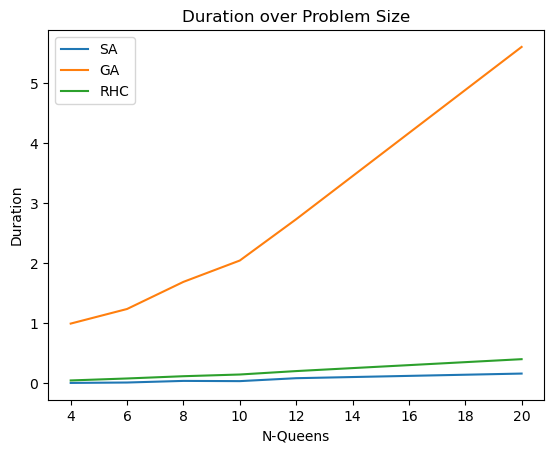

In [3]:
# Define the N-Queens problem for a given size N
class CountingQueens(mlrose.Queens):
    def __init__(self):
        super().__init__()
        self.fevals = 0
    
    def evaluate(self, state):
        self.fevals += 1
        return super().evaluate(state)
fitness = CountingQueens()
sizes = [4, 6, 8, 10, 12, 20]
best_fitness_results = {'SA': [], 'GA': [], 'RHC': []}
fevals_results = {'SA': [], 'GA': [], 'RHC': []}
duration_results = {'SA': [], 'GA': [], 'RHC': []}

for size in sizes:
    problem = mlrose.DiscreteOpt(length=size, fitness_fn=fitness, maximize=False, max_val=size)
    schedule = mlrose.ArithDecay(init_temp=1, decay=0.95, min_temp=0.01)
    start_time = time.time()
    _, best_fitness, _ = mlrose.simulated_annealing(problem, schedule=schedule, max_attempts=100, max_iters=1000, curve=True)
    end_time = time.time()
    feval = fitness.fevals
    duration = end_time - start_time
    best_fitness_results['SA'].append(best_fitness)
    duration_results['SA'].append(duration)
    fevals_results['SA'].append(feval)

    # Genetic Algorithm
    
    
    start_time = time.time()
    pop_size = 200
    mutation_prob = 0.1
    _, best_fitness, _ = mlrose.genetic_alg(problem, pop_size=pop_size, mutation_prob=mutation_prob, max_attempts=100, max_iters=1000, curve=True)

    end_time = time.time()
    feval = fitness.fevals
    duration = end_time - start_time
    best_fitness_results['GA'].append(best_fitness)
    duration_results['GA'].append(duration)
    fevals_results['GA'].append(feval)
    
    restarts = 10
    # Randomized Hill Climbing
    start_time = time.time()
    _, best_fitness, _ = mlrose.random_hill_climb(problem, max_attempts=100, max_iters=1000, restarts=restarts, curve=True)

    end_time = time.time()
    feval = fitness.fevals
    duration = end_time - start_time
    best_fitness_results['RHC'].append(best_fitness)
    duration_results['RHC'].append(duration)
    fevals_results['RHC'].append(feval)

plt.figure()
for alg in fevals_results.keys():
    fevals = fevals_results[alg]
    plt.plot(sizes, fevals, label=alg)
    
plt.xlabel('N-Queens')
plt.ylabel('Fevals')
plt.title('Fevals over Problem Size')
plt.legend()
plt.show()


plt.figure()
for alg in best_fitness_results.keys():
    fitness = best_fitness_results[alg]
    plt.plot(sizes, fitness, label=alg)
    
plt.xlabel('N-Queens')
plt.ylabel('Fitness')
plt.title('Fitness over Problem Size')
plt.legend()
plt.show()

plt.figure()
for alg in best_fitness_results.keys():
    duration = duration_results[alg]
    plt.plot(sizes, duration, label=alg)
    
plt.xlabel('N-Queens')
plt.ylabel('Duration')
plt.title('Duration over Problem Size')
plt.legend()
plt.show()


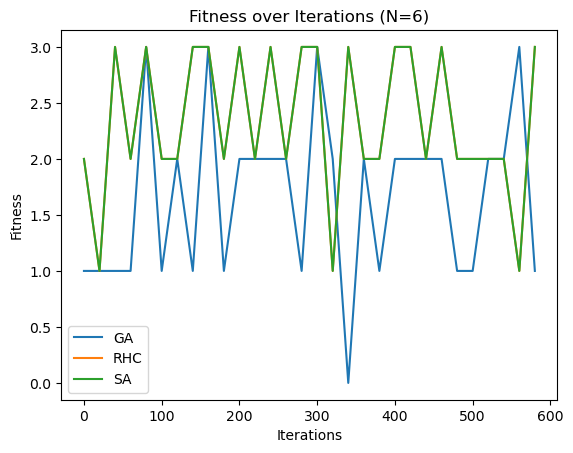

In [5]:

iterations = range(0, 600, 20)
size = 6
results = {'SA': [], 'GA': [], 'RHC': []}
for iteration in iterations:
    schedule = mlrose.ArithDecay(init_temp=1, decay=0.95, min_temp=0.01)
    _, best_fitness_ga, _ = mlrose.genetic_alg(problem, pop_size=pop_size, mutation_prob=mutation_prob, max_attempts=100, max_iters=100, curve=True)
    _, best_fitness_rhc, _ = mlrose.random_hill_climb(problem, max_attempts=100, max_iters=1000, restarts=restarts, curve=True)
    _, best_fitness_sa, _ = mlrose.simulated_annealing(problem, schedule=schedule, max_attempts=100, max_iters=100, curve=True)
   
    
    results['SA'].append(best_fitness_rhc)
    results['GA'].append(best_fitness_ga)
    results['RHC'].append(best_fitness_rhc)
    
    
plt.figure()
for alg in ['GA', 'RHC','SA']:
    plt.plot(iterations, results[alg], label=alg)
plt.xlabel('Iterations')
plt.ylabel('Fitness')
plt.title('Fitness over Iterations (N=6)')
plt.legend()
plt.show()


# TSP Problem

mutation probability validation curve

In [6]:
import random
class CountingTravellingSales(mlrose.TravellingSales):
    def __init__(self, coords):
        super().__init__(coords=coords)

        # Initialize fevals counter
        self.fevals = 0
    
    def evaluate(self, state):
        self.fevals += 1
        return super().evaluate(state)

# Define problem sizes
problem_sizes = [5, 10, 20, 40, 60]

fevals_results = {5: [], 10:[], 20:[], 40:[], 60:[], 80:[]}
duration_results = {5: [], 10:[], 20:[], 40:[], 60:[], 80:[]}
sizes_results = {5: [], 10:[], 20:[], 40:[], 60:[], 80:[]}
for size in problem_sizes:
    for mutation_prob in [0.1,0.2,0.3,0.4,0.5]:
        coords_list = list(np.random.randint(100, size=(size, 2)))
        # Define distance matrix for TSP
        distance_matrix = CountingTravellingSales(coords=coords_list)
        # Define TSP problem object
        problem = mlrose.TSPOpt(length=len(coords_list), fitness_fn=distance_matrix, maximize=False)
        start_time = time.time()
        _, best_fitness, _ = mlrose.genetic_alg(problem, pop_size=50, mutation_prob=mutation_prob, max_attempts=1000, max_iters=1000, curve=True)

        end_time = time.time()
        feval = distance_matrix.fevals
        duration = end_time - start_time
        duration_results[size].append(duration)
        fevals_results[size].append(feval)
        sizes_results[size].append(best_fitness)


5 0.1
5 0.2
5 0.3
5 0.4
5 0.5
10 0.1
10 0.2
10 0.3
10 0.4
10 0.5
20 0.1
20 0.2
20 0.3
20 0.4
20 0.5
40 0.1
40 0.2
40 0.3
40 0.4
40 0.5
60 0.1
60 0.2
60 0.3
60 0.4
60 0.5


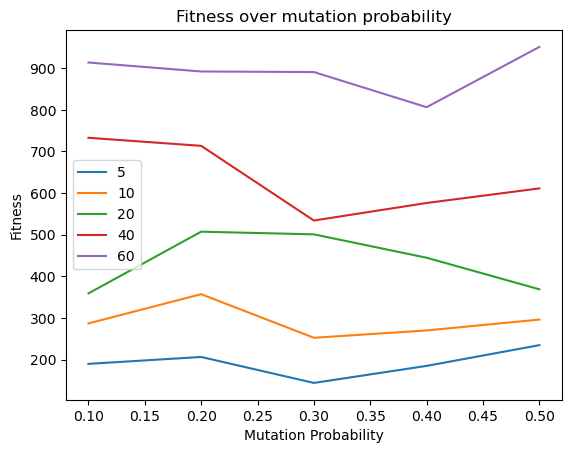

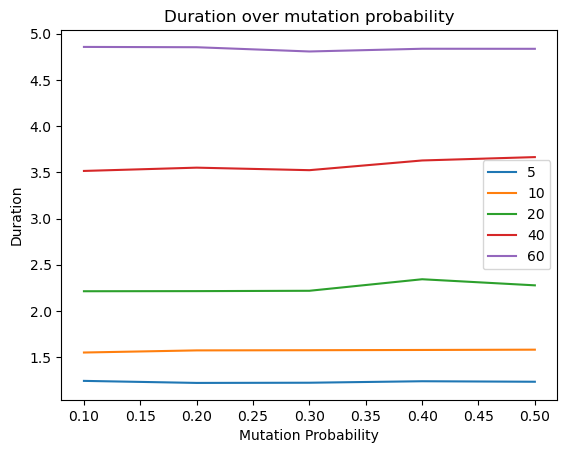

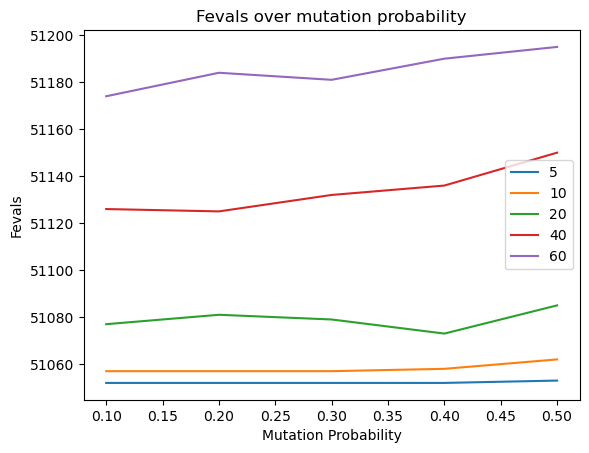

In [7]:
    
plt.figure()
for alg in problem_sizes:
    fitness = sizes_results[alg]
    plt.plot([0.1,0.2,0.3,0.4,0.5], fitness, label=alg)
    
plt.xlabel('Mutation Probability')
plt.ylabel('Fitness')
plt.title('Fitness over mutation probability')
plt.legend()
plt.show()

plt.figure()
for alg in problem_sizes:
    fitness = duration_results[alg]
    plt.plot([0.1,0.2,0.3,0.4,0.5], fitness, label=alg)
    
plt.xlabel('Mutation Probability')
plt.ylabel('Duration')
plt.title('Duration over mutation probability')
plt.legend()
plt.show()

plt.figure()
for alg in problem_sizes:
    fitness = fevals_results[alg]
    plt.plot([0.1,0.2,0.3,0.4,0.5], fitness, label=alg)
    
plt.xlabel('Mutation Probability')
plt.ylabel('Fevals')
plt.title('Fevals over mutation probability')
plt.legend()
plt.show()

pop size validation curve

In [8]:
import random
class CountingTravellingSales(mlrose.TravellingSales):
    def __init__(self, coords):
        super().__init__(coords=coords)

        # Initialize fevals counter
        self.fevals = 0
    
    def evaluate(self, state):
        self.fevals += 1
        return super().evaluate(state)

# Define problem sizes
problem_sizes = [5, 10, 20, 40, 60]

fevals_results = {5: [], 10:[], 20:[], 40:[], 60:[], 80:[]}
duration_results = {5: [], 10:[], 20:[], 40:[], 60:[], 80:[]}
sizes_results = {5: [], 10:[], 20:[], 40:[], 60:[], 80:[]}
for size in problem_sizes:
    for pop_size in [20,  40, 60,80,100, 150,200]:
        print(size, pop_size)
        coords_list = list(np.random.randint(100, size=(size, 2)))
        # Define distance matrix for TSP
        distance_matrix = CountingTravellingSales(coords=coords_list)
        # Define TSP problem object
        problem = mlrose.TSPOpt(length=len(coords_list), fitness_fn=distance_matrix, maximize=False)
        start_time = time.time()
        _, best_fitness, _ = mlrose.genetic_alg(problem, pop_size=pop_size, mutation_prob=0.2, max_attempts=1000, max_iters=1000, curve=True)

        end_time = time.time()
        feval = distance_matrix.fevals
        duration = end_time - start_time
        duration_results[size].append(duration)
        fevals_results[size].append(feval)
        sizes_results[size].append(best_fitness)

#         print(f"size: {size}， pop_size: {pop_size}, mutation_prob: {mutation_prob}, Best Fitness: {best_fitness}, Duration: {duration:.4f} seconds")


5 20
5 40
5 60
5 80
5 100
5 150
5 200
10 20
10 40
10 60
10 80
10 100
10 150
10 200
20 20
20 40
20 60
20 80
20 100
20 150
20 200
40 20
40 40
40 60
40 80
40 100
40 150
40 200
60 20
60 40
60 60
60 80
60 100
60 150
60 200


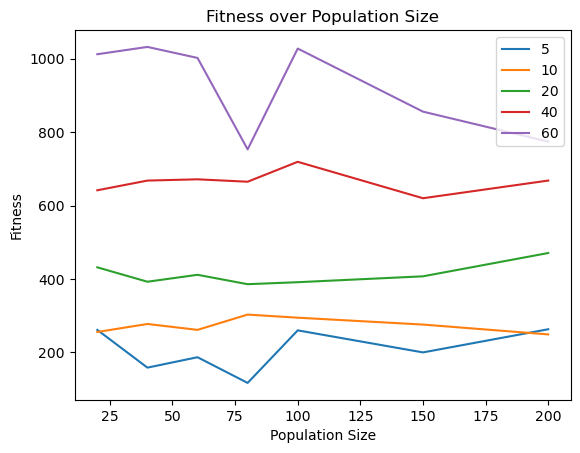

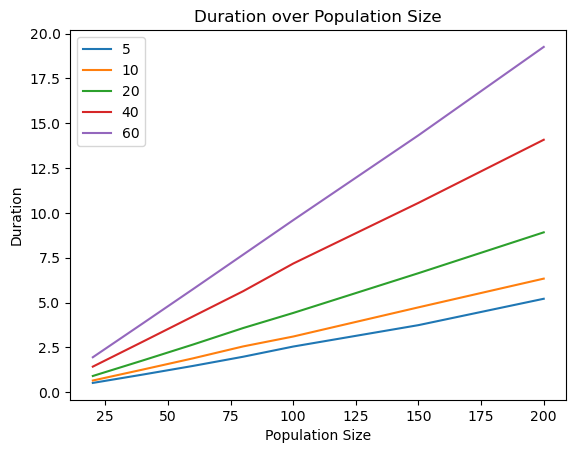

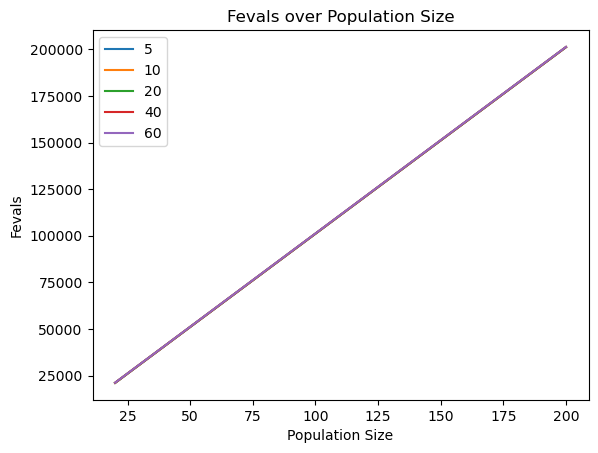

In [9]:

    
plt.figure()
for alg in problem_sizes:
    fitness = sizes_results[alg]
    plt.plot([20,  40, 60,80,100, 150,200], fitness, label=alg)
    
plt.xlabel('Population Size')
plt.ylabel('Fitness')
plt.title('Fitness over Population Size')
plt.legend()
plt.show()

plt.figure()
for alg in problem_sizes:
    fitness = duration_results[alg]
    plt.plot([20,  40, 60,80,100, 150,200], fitness, label=alg)
    
plt.xlabel('Population Size')
plt.ylabel('Duration')
plt.title('Duration over Population Size')
plt.legend()
plt.show()

plt.figure()
for alg in problem_sizes:
    fitness = fevals_results[alg]
    plt.plot([20,  40, 60,80,100, 150,200], fitness, label=alg)
    
plt.xlabel('Population Size')
plt.ylabel('Fevals')
plt.title('Fevals over Population Size')
plt.legend()
plt.show()

plot feval over problem size, fitness over problem size and duration over problem size 

In [10]:
class CountingTravellingSales(mlrose.TravellingSales):
    def __init__(self, coords):
        super().__init__(coords=coords)

        # Initialize fevals counter
        self.fevals = 0
    
    def evaluate(self, state):
        self.fevals += 1
        return super().evaluate(state)

# Define problem sizes
problem_sizes = problem_sizes = [5, 10, 20, 40, 60]
pop_sizes = {
    5:40, 10:100, 20:100,40:150,60:150,
}

best_fitness_results = {'SA': [], 'GA': [], 'RHC': []}
fevals_results = {'SA': [], 'GA': [], 'RHC': []}
duration_results = {'SA': [], 'GA': [], 'RHC': []}

for size in problem_sizes:
    coords_list = list(np.random.randint(100, size=(size, 2)))
    # Define distance matrix for TSP
    distance_matrix = CountingTravellingSales(coords=coords_list)
    # Define TSP problem object
    problem = mlrose.TSPOpt(length=len(coords_list), fitness_fn=distance_matrix, maximize=False)

    
    schedule = mlrose.ArithDecay(init_temp=1, decay=0.95, min_temp=0.01)
    start_time = time.time()
    _, best_fitness, _ = mlrose.simulated_annealing(problem, schedule=schedule, max_attempts=1000, max_iters=100, curve=True)
    end_time = time.time()
    feval = distance_matrix.fevals
    duration = end_time - start_time
    best_fitness_results['SA'].append(best_fitness)
    duration_results['SA'].append(duration)
    fevals_results['SA'].append(feval)


    start_time = time.time()
    _, best_fitness, _ = mlrose.genetic_alg(problem, pop_size=pop_sizes[size], mutation_prob=0.1, max_attempts=1000, max_iters=100, curve=True)

    end_time = time.time()
    feval = distance_matrix.fevals
    duration = end_time - start_time
    best_fitness_results['GA'].append(best_fitness)
    duration_results['GA'].append(duration)
    fevals_results['GA'].append(feval)
    
    restarts = 10
    # Randomized Hill Climbing
    start_time = time.time()
    _, best_fitness, _ = mlrose.random_hill_climb(problem, max_attempts=1000, max_iters=100, restarts=restarts, curve=True)

    end_time = time.time()
    feval = distance_matrix.fevals
    duration = end_time - start_time
    best_fitness_results['RHC'].append(best_fitness)
    duration_results['RHC'].append(duration)
    fevals_results['RHC'].append(feval)



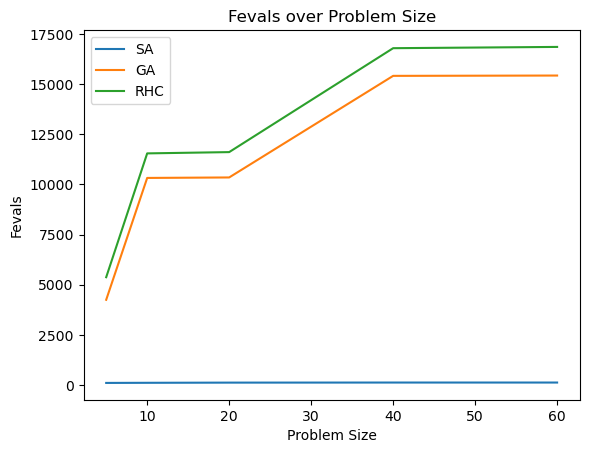

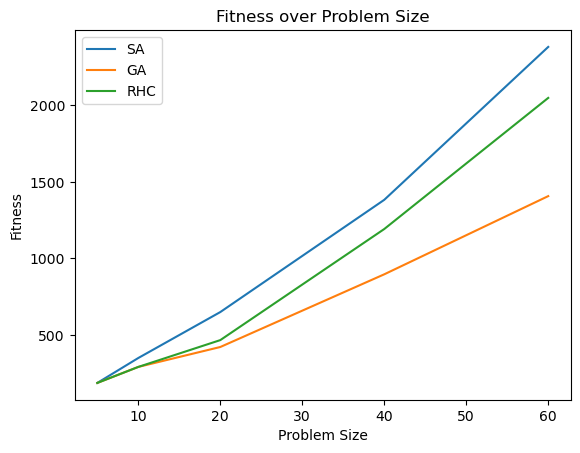

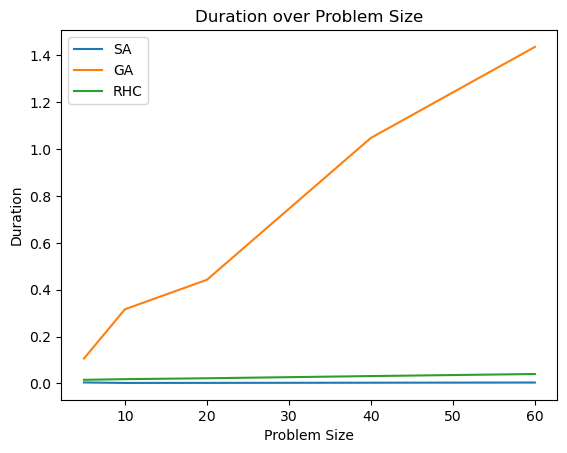

In [11]:
    
    
plt.figure()
for alg in fevals_results.keys():
    fevals = fevals_results[alg]
    plt.plot(problem_sizes, fevals, label=alg)
    
plt.xlabel('Problem Size')
plt.ylabel('Fevals')
plt.title('Fevals over Problem Size')
plt.legend()
plt.show()


plt.figure()
for alg in best_fitness_results.keys():
    fitness = best_fitness_results[alg]
    plt.plot(problem_sizes, fitness, label=alg)
    
plt.xlabel('Problem Size')
plt.ylabel('Fitness')
plt.title('Fitness over Problem Size')
plt.legend()
plt.show()

plt.figure()
for alg in duration_results.keys():
    duration = duration_results[alg]
    plt.plot(problem_sizes, duration, label=alg)
plt.xlabel('Problem Size')
plt.ylabel('Duration')
plt.title('Duration over Problem Size')
plt.legend()
plt.show()

plot fitness over iteration

1
101
201
301
401
501
601
701
801
901


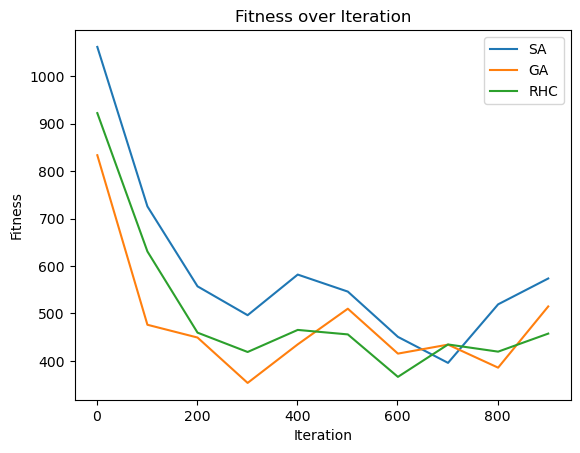

In [12]:
class CountingTravellingSales(mlrose.TravellingSales):
    def __init__(self, coords):
        super().__init__(coords=coords)

        # Initialize fevals counter
        self.fevals = 0

    def evaluate(self, state):
        self.fevals += 1
        return super().evaluate(state)

# Define problem sizes
pop_sizes = {
    5:40, 10:100, 20:100,40:150,60:150,
}

best_fitness_results = {'SA': [], 'GA': [], 'RHC': []}
fevals_results = {'SA': [], 'GA': [], 'RHC': []}
duration_results = {'SA': [], 'GA': [], 'RHC': []}

size = 20
for iteration in range(1, 1000, 100):
    print(iteration)
    coords_list = list(np.random.randint(100, size=(size, 2)))
    # Define distance matrix for TSP
    distance_matrix = CountingTravellingSales(coords=coords_list)
    # Define TSP problem object
    problem = mlrose.TSPOpt(length=len(coords_list), fitness_fn=distance_matrix, maximize=False)

    
    schedule = mlrose.ArithDecay(init_temp=1, decay=0.95, min_temp=0.01)
    start_time = time.time()
    _, best_fitness, _ = mlrose.simulated_annealing(problem, schedule=schedule, max_attempts=1000, max_iters=iteration, curve=True)
    end_time = time.time()
    feval = distance_matrix.fevals
    duration = end_time - start_time
    best_fitness_results['SA'].append(best_fitness)
    duration_results['SA'].append(duration)
    fevals_results['SA'].append(feval)


    start_time = time.time()
    _, best_fitness, _ = mlrose.genetic_alg(problem, pop_size=pop_sizes[size], mutation_prob=0.1, max_attempts=1000, max_iters=iteration, curve=True)

    end_time = time.time()
    feval = distance_matrix.fevals
    duration = end_time - start_time
    best_fitness_results['GA'].append(best_fitness)
    duration_results['GA'].append(duration)
    fevals_results['GA'].append(feval)
    
    restarts = 10
    # Randomized Hill Climbing
    start_time = time.time()
    _, best_fitness, _ = mlrose.random_hill_climb(problem, max_attempts=1000, max_iters=iteration, restarts=restarts, curve=True)

    end_time = time.time()
    feval = distance_matrix.fevals
    duration = end_time - start_time
    best_fitness_results['RHC'].append(best_fitness)
    duration_results['RHC'].append(duration)
    fevals_results['RHC'].append(feval)




plt.figure()
for alg in best_fitness_results.keys():
    fitness = best_fitness_results[alg]
    plt.plot(range(1, 1000, 100), fitness, label=alg)
    
plt.xlabel('Iteration')
plt.ylabel('Fitness')
plt.title('Fitness over Iteration')
plt.legend()
plt.show()



# Neural Network Problem

In [2]:
# Load data 
hospital = pd.read_csv('medical.csv')
hospital['SEX'] = hospital['SEX'].replace({'F':0,'M':1})
hospital['SOURCE'] = hospital['SOURCE'].replace({'in':0,'out':1})
hospital_y = hospital['SOURCE']
hospital_x = hospital.drop('SOURCE',axis = 1)
x_train, x_test, y_train, y_test = train_test_split(
    hospital_x, hospital_y, test_size = 0.20)

In [5]:
import seaborn as sns

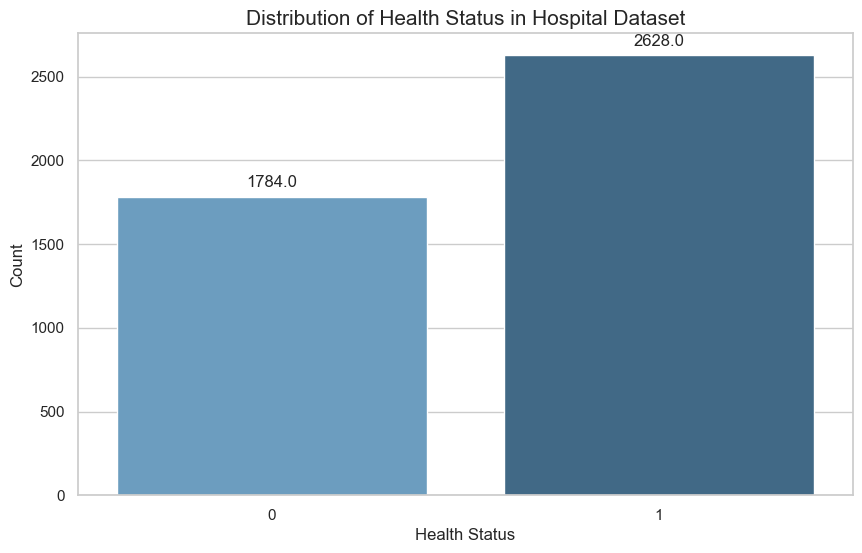

In [6]:
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

ax = sns.countplot(x='SOURCE', data=hospital, palette="Blues_d")
ax.set_title('Distribution of Health Status in Hospital Dataset', fontsize=15)
ax.set_xlabel('Health Status', fontsize=12)
ax.set_ylabel('Count', fontsize=12)

# Annotate the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

In [14]:
# Define range of learning rates to evaluate
learning_rates = [0.001, 0.01, 0.1, 0.5, 1.0]

# Split the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(hospital_x, hospital_y, test_size=0.2, random_state=42)

# Common settings for the neural network
hidden_nodes = [5, 2]
activation = 'relu'
max_iters = 100
bias = True
is_classifier = True
early_stopping = True
clip_max = 1.0
max_attempts = 100
random_state = 42
curve = True

train_f1_scores = {'random_hill_climb': [], 'simulated_annealing': [], 'genetic_alg': [], 'gradient_descent':[]}
val_f1_scores = {'random_hill_climb': [], 'simulated_annealing': [], 'genetic_alg': [], 'gradient_descent':[]}

for algo in ['random_hill_climb', 'simulated_annealing',  'genetic_alg']:
    
    for lr in learning_rates:
        nn_gd = mlrose.NeuralNetwork(
            hidden_nodes=hidden_nodes,
            activation=activation,
            algorithm=algo,
            max_iters=max_iters,
            bias=bias,
            is_classifier=is_classifier,
            learning_rate=lr,
            early_stopping=early_stopping,
            clip_max=clip_max,
            max_attempts=max_attempts,
            random_state=random_state,
            curve=curve
        )

        nn_gd.fit(X_train, y_train)

        y_train_pred = nn_gd.predict(X_train)
        y_val_pred = nn_gd.predict(X_val)

        train_f1 = f1_score(y_train, y_train_pred, average='weighted')
        val_f1 = f1_score(y_val, y_val_pred, average='weighted')

        train_f1_scores[algo].append(train_f1)
        val_f1_scores[algo].append(val_f1)

        # Print current results
        print(f'Learning Rate: {lr}')
        print(f'Train F1 Score: {train_f1}')
        print(f'Validation F1 Score: {val_f1}\n')

        


Learning Rate: 0.001
Train F1 Score: 0.6386060196921707
Validation F1 Score: 0.6231045211403765

Learning Rate: 0.01
Train F1 Score: 0.6374722351692158
Validation F1 Score: 0.6089185582738613

Learning Rate: 0.1
Train F1 Score: 0.629401730768094
Validation F1 Score: 0.6160557436971987

Learning Rate: 0.5
Train F1 Score: 0.22812744499613904
Validation F1 Score: 0.25204449645968985

Learning Rate: 1.0
Train F1 Score: 0.22812744499613904
Validation F1 Score: 0.25204449645968985

Learning Rate: 0.001
Train F1 Score: 0.6386329654605756
Validation F1 Score: 0.6231045211403765

Learning Rate: 0.01
Train F1 Score: 0.6387862478291653
Validation F1 Score: 0.6268879912554851

Learning Rate: 0.1
Train F1 Score: 0.22812744499613904
Validation F1 Score: 0.25204449645968985

Learning Rate: 0.5
Train F1 Score: 0.22812744499613904
Validation F1 Score: 0.25204449645968985

Learning Rate: 1.0
Train F1 Score: 0.22816010213016644
Validation F1 Score: 0.2510961815253143

Learning Rate: 0.001
Train F1 Score:

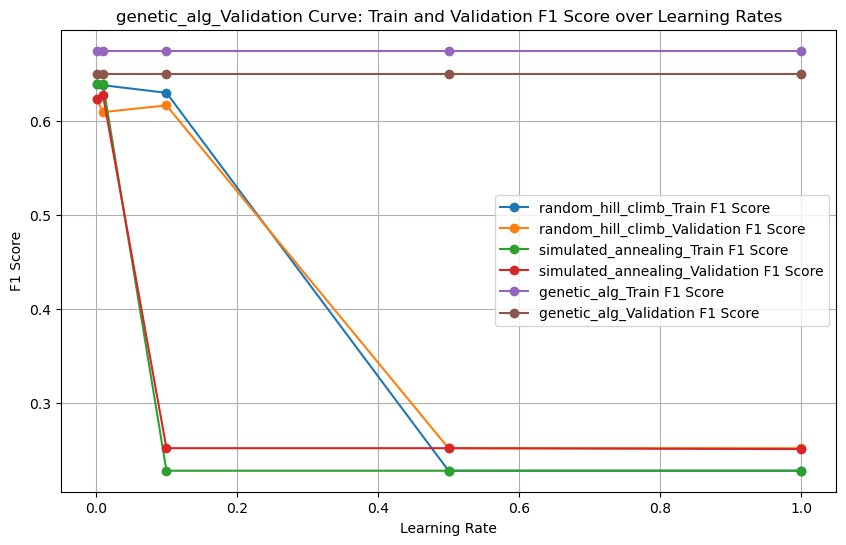

In [15]:
# Plotting the validation curve of learning rate 
plt.figure(figsize=(10, 6))
for algo in ['random_hill_climb', 'simulated_annealing', 'genetic_alg']:
    plt.plot(learning_rates, train_f1_scores[algo], label=algo + '_Train F1 Score', marker='o')
    plt.plot(learning_rates, val_f1_scores[algo], label=algo+'_Validation F1 Score', marker='o')
plt.xlabel('Learning Rate')
plt.ylabel('F1 Score')
plt.title(algo +'_Validation Curve: Train and Validation F1 Score over Learning Rates')
plt.legend()
plt.grid()
plt.show()


In [16]:
# Plotting the validation curve of differnet hidden layer size 

hidden_layer_sizes = [(5,), (10,), (15,), (20,)]
train_f1_scores = {'random_hill_climb': [], 'simulated_annealing': [], 'genetic_alg': [], 'gradient_descent':[]}
val_f1_scores = {'random_hill_climb': [], 'simulated_annealing': [], 'genetic_alg': [], 'gradient_descent':[]}

for algo in ['random_hill_climb', 'simulated_annealing', 'genetic_alg']:
    for hidden_layer_size in hidden_layer_sizes:
        # Initialize the neural network
        nn_gd = mlrose.NeuralNetwork(
            hidden_nodes=hidden_layer_size,
            activation=activation,
            algorithm=algo,
            max_iters=max_iters,
            bias=bias,
            is_classifier=is_classifier,
            early_stopping=early_stopping,
            clip_max=clip_max,
            max_attempts=max_attempts,
            random_state=random_state,
            curve=curve
        )

        # Train the neural network
        nn_gd.fit(X_train, y_train)

        # Predict and calculate F1 scores on validation set
        y_val_pred = nn_gd.predict(X_val)

        train_f1 = f1_score(y_train, y_train_pred, average='weighted')
        val_f1 = f1_score(y_val, y_val_pred, average='weighted')

        # Store the results
        train_f1_scores[algo].append(train_f1)
        val_f1_scores[algo].append(val_f1)

        # Print current results
        print(f'Hidden Layer Size: {hidden_layer_size}')
        print(f'Train F1 Score: {train_f1}')
        print(f'Validation F1 Score: {val_f1}\n')



Hidden Layer Size: (5,)
Train F1 Score: 0.6741008718312881
Validation F1 Score: 0.6418808491394242

Hidden Layer Size: (10,)
Train F1 Score: 0.6741008718312881
Validation F1 Score: 0.45037507409952143

Hidden Layer Size: (15,)
Train F1 Score: 0.6741008718312881
Validation F1 Score: 0.5671008245539334

Hidden Layer Size: (20,)
Train F1 Score: 0.6741008718312881
Validation F1 Score: 0.6652822954895732

Hidden Layer Size: (5,)
Train F1 Score: 0.6741008718312881
Validation F1 Score: 0.6385526617410452

Hidden Layer Size: (10,)
Train F1 Score: 0.6741008718312881
Validation F1 Score: 0.43426136929934

Hidden Layer Size: (15,)
Train F1 Score: 0.6741008718312881
Validation F1 Score: 0.5796268904849726

Hidden Layer Size: (20,)
Train F1 Score: 0.6741008718312881
Validation F1 Score: 0.6565810754074621

Hidden Layer Size: (5,)
Train F1 Score: 0.6741008718312881
Validation F1 Score: 0.6669224505785115

Hidden Layer Size: (10,)
Train F1 Score: 0.6741008718312881
Validation F1 Score: 0.626474528023

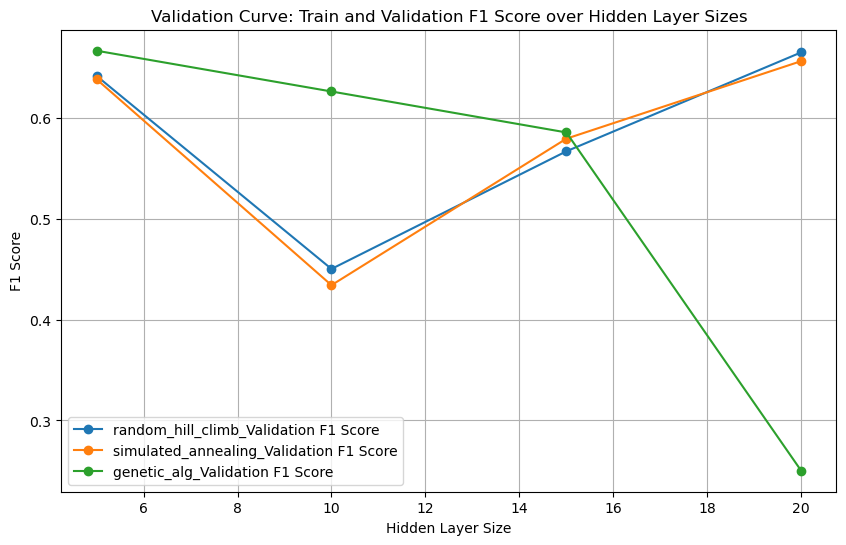

In [17]:
# Plotting the validation curve of different hidden layer size 

plt.figure(figsize=(10, 6))
for algo in ['random_hill_climb', 'simulated_annealing', 'genetic_alg']:
    plt.plot([5,10,15,20], val_f1_scores[algo], label=algo+'_Validation F1 Score', marker='o')
plt.xlabel('Hidden Layer Size')
plt.ylabel('F1 Score')
plt.title('Validation Curve: Train and Validation F1 Score over Hidden Layer Sizes')
plt.legend()
plt.grid()
plt.show()

In [ ]:
# plot 
problem_sizes = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7,0.8, 0.9]

# Common settings for the neural network
hidden_nodes = [10]
activation = 'relu'
max_iters = 100
bias = True
is_classifier = True
learning_rate = 0.001
early_stopping = True
clip_max = 1.0
max_attempts = 100
random_state = 42
curve = True

# Lists to store results
train_accuracies = {
    'random_hill_climb': [], 'simulated_annealing': [], 'genetic_alg': [], 'gradient_descent':[]
}
test_accuracies = {
    'random_hill_climb': [], 'simulated_annealing': [], 'genetic_alg': [],'gradient_descent':[]
}
train_durations = {
    'random_hill_climb': [], 'simulated_annealing': [], 'genetic_alg': [],'gradient_descent':[]
}
test_durations = {
    'random_hill_climb': [], 'simulated_annealing': [], 'genetic_alg': [],'gradient_descent':[]
}

for size in problem_sizes:
    # Create a subset of the dataset based on the current problem size
    X_subset, _, y_subset, _ = train_test_split(hospital_x, hospital_y, train_size=size, random_state=random_state)

    # Further split the subset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_subset, y_subset, test_size=0.2, random_state=random_state)        
    
    
    for algo in ['random_hill_climb', 'simulated_annealing', 'genetic_alg', 'gradient_descent']:
        # Initialize the neural network with Gradient Descent
        nn_gd = mlrose.NeuralNetwork(
            hidden_nodes=hidden_nodes,
            activation=activation,
            algorithm=algo,
            max_iters=max_iters,
            bias=bias,
            is_classifier=is_classifier,
            learning_rate=learning_rate,
            early_stopping=early_stopping,
            clip_max=clip_max,
            max_attempts=max_attempts,
            random_state=random_state,
            curve=curve
        )
        start_time = time.time()

        # Train the neural network
        nn_gd.fit(X_train, y_train)
        end_time = time.time()
        train_duration = end_time - start_time
        
        # Predict and calculate accuracies
        y_train_pred = nn_gd.predict(X_train)
        start_time = time.time()
        y_test_pred = nn_gd.predict(X_test)
        end_time = time.time()
        test_duration = end_time - start_time

        train_f1 = f1_score(y_train, y_train_pred, average='weighted')
        test_f1 = f1_score(y_test, y_test_pred, average='weighted')

        # Store the results
        train_accuracies[algo].append(train_f1)
        test_accuracies[algo].append(test_f1)
        train_durations[algo].append(train_duration)
        test_durations[algo].append(test_duration)

        # Print current results
        print(f'Problem size: {size}%')
        print(f'Train Accuracy: {train_f1}')
        print(f'Test Accuracy: {test_f1}\n')
        print(f'Train Duration: {train_duration}')
        print(f'Test Duration: {test_duration}\n')
        

        



Problem size: 0.1%
Train Accuracy: 0.4781336636242093
Test Accuracy: 0.5142551402583505

Train Duration: 0.06137704849243164
Test Duration: 6.604194641113281e-05

Problem size: 0.1%
Train Accuracy: 0.4781336636242093
Test Accuracy: 0.5142551402583505

Train Duration: 0.08013391494750977
Test Duration: 5.7220458984375e-05

Problem size: 0.1%
Train Accuracy: 0.6509015507170096
Test Accuracy: 0.6682943313339529

Train Duration: 8.052767038345337
Test Duration: 5.507469177246094e-05

Problem size: 0.1%
Train Accuracy: 0.21535022354694489
Test Accuracy: 0.17996254681647944

Train Duration: 0.08166384696960449
Test Duration: 5.1975250244140625e-05

Problem size: 0.2%
Train Accuracy: 0.4540178682527436
Test Accuracy: 0.4624442462087422

Train Duration: 0.054804086685180664
Test Duration: 6.29425048828125e-05

Problem size: 0.2%
Train Accuracy: 0.4540178682527436
Test Accuracy: 0.4624442462087422

Train Duration: 0.09244894981384277
Test Duration: 6.508827209472656e-05

Problem size: 0.2%
Trai

In [ ]:
# plot accuracy curve 

plt.figure(figsize=(10, 6))
for algo in ['random_hill_climb', 'simulated_annealing','genetic_alg']:

    plt.plot([size * len(hospital_x) for size in problem_sizes], train_accuracies[algo], label=algo + '_Train Accuracy', marker='o')
    plt.plot([size * len(hospital_x) for size in problem_sizes], test_accuracies[algo], label=algo + '_Test Accuracy', marker='o')
plt.xlabel('Problem Size (%)')
plt.ylabel('F1 Score')
plt.title('Train and Test Accuracy over Different Problem Sizes')
plt.legend()
plt.grid()
plt.show()

In [ ]:
# plot duration over problem size curve 
plt.figure(figsize=(10, 6))
for algo in ['random_hill_climb', 'simulated_annealing',  'genetic_alg', 'gradient_descent']:

    plt.plot([size * len(hospital_x) for size in problem_sizes], train_durations[algo], label=algo + '_Train Time', marker='o')
plt.xlabel('Problem Size (%)')
plt.ylabel('Duration')
plt.title('Train time over Different Problem Sizes')
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(10, 6))
for algo in ['random_hill_climb', 'simulated_annealing',  'genetic_alg', 'gradient_descent']:

    plt.plot([size * len(hospital_x) for size in problem_sizes], test_durations[algo], label=algo + '_Test Time', marker='o')
plt.xlabel('Problem Size (%)')
plt.ylabel('Duration')
plt.title('Test time over Different Problem Sizes')
plt.legend()
plt.grid()
plt.show()

In [ ]:
# Plot loss curve 

# Split the dataset into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(hospital_x, hospital_y, test_size=0.2, random_state=42)


# Define neural network architecture
hidden_nodes = [5]


# Define a function to train the neural network using a given optimization algorithm
def train_nn(algorithm, algorithm_params, algo_name, max_iters=100):
    # Define the neural network
    nn_model = mlrose.NeuralNetwork(hidden_nodes=hidden_nodes, activation='relu', algorithm=algorithm,
                                    max_iters=max_iters, bias=True, is_classifier=True, learning_rate=0.001,
                                    early_stopping=False, max_attempts=100, random_state=42,
                                    curve=True)

    # Train the neural network
    nn_model.fit(X_train, y_train)
    # Record the loss history
    if algorithm == 'gradient_descent':
        loss_history = nn_model.fitness_curve
    else:
        loss_history = nn_model.fitness_curve[:, 0]
#     print(loss_history)
    return loss_history

# Define optimization parameters
sa_params = {'schedule': mlrose.ExpDecay()}
ga_params = {}
rhc_params = {}
gd_params = {}

# Train using different algorithms and record loss history
rhc_loss_history = train_nn('random_hill_climb', rhc_params, 'RHC')
ga_loss_history = train_nn('genetic_alg', ga_params, 'GA')
sa_loss_history = train_nn('simulated_annealing', sa_params, 'SA')
# gd_loss_history = train_nn('gradient_descent', gd_params, 'GD')

# Plot loss curves
plt.plot(rhc_loss_history, label='RHC')
plt.plot(ga_loss_history, label='GA')
plt.plot(sa_loss_history, label='SA')
# plt.plot(gd_loss_history, label='GD')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss Curve Comparison')
plt.legend()
plt.grid()
plt.show()

